Training the neural network...


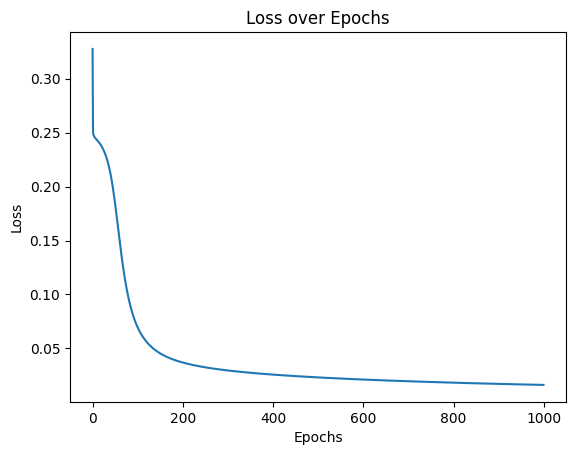

Testing the network...
Predictions:
[[0.54134569]
 [0.56934476]
 [0.55536791]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.random.rand(hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.random.rand(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Hidden layer activation
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)

        # Output layer activation
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_layer_input)
        return self.output

    def backpropagation(self, X, y):
        # Calculate the error
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)

        # Hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs):
        losses = []
        for _ in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y)
            loss = np.mean(np.square(y - self.output))  # Mean Squared Error
            losses.append(loss)
        return losses

def generate_data(samples=100):
    """Generate synthetic data for training."""
    X = np.random.rand(samples, 2)
    y = np.array([[1 if x1 + x2 > 1 else 0] for x1, x2 in X])
    return X, y

def plot_loss(losses):
    """Plot the loss over epochs."""
    plt.plot(losses)
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

def main():
    # Generate synthetic data
    X, y = generate_data(samples=100)

    # Initialize and train the neural network
    input_size = 2
    hidden_size = 3
    output_size = 1
    learning_rate = 0.1
    epochs = 1000

    nn = SimpleNeuralNetwork(input_size, hidden_size, output_size, learning_rate)
    print("Training the neural network...")
    losses = nn.train(X, y, epochs)

    # Plot the loss
    plot_loss(losses)

    # Test the network
    test_samples = np.array([[0.2, 0.8], [0.8, 0.2], [0.5, 0.5]])
    print("Testing the network...")
    predictions = nn.feedforward(test_samples)
    print("Predictions:")
    print(predictions)

if __name__ == "__main__":
    main()
